In [1]:
# Import necesary libraries
import yfinance as yf
import numpy as np


# Download historical data for required stocks
tickers = ["AMZN","GOOG","MSFT"]
ohlcv_data = {}


# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in tickers:
   temp = yf.download(ticker,period='1mo',interval='5m')
   temp.dropna(how="any",inplace=True)
   ohlcv_data[ticker] = temp
  
def ATR(DF, n=14):
   "function to calculate True Range and Average True Range"
   df = DF.copy()
   df["H-L"] = df["High"] - df["Low"]
   df["H-PC"] = abs(df["High"] - df["Adj Close"].shift(1))
   df["L-PC"] = abs(df["Low"] - df["Adj Close"].shift(1))
   df["TR"] = df[["H-L","H-PC","L-PC"]].max(axis=1, skipna=False)
   df["ATR"] = df["TR"].ewm(com=n, min_periods=n).mean()
   return df["ATR"]


def ADX(DF, n=20):
   "function to calculate ADX"
   df = DF.copy()
   df["ATR"] = ATR(DF, n)
   df["upmove"] = df["High"] - df["High"].shift(1)
   df["downmove"] = df["Low"].shift(1) - df["Low"]
   df["+dm"] = np.where((df["upmove"]>df["downmove"]) & (df["upmove"] >0), df["upmove"], 0)
   df["-dm"] = np.where((df["downmove"]>df["upmove"]) & (df["downmove"] >0), df["downmove"], 0)
   df["+di"] = 100 * (df["+dm"]/df["ATR"]).ewm(alpha=1/n, min_periods=n).mean()
   df["-di"] = 100 * (df["-dm"]/df["ATR"]).ewm(alpha=1/n, min_periods=n).mean()
   df["ADX"] = 100* abs((df["+di"] - df["-di"])/(df["+di"] + df["-di"])).ewm(alpha=1/n, min_periods=n).mean()
   return df["ADX"]


for ticker in ohlcv_data:
   ohlcv_data[ticker]["ADX"] = ADX(ohlcv_data[ticker],20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
ohlcv_data['MSFT']

,Open,High,Low,Close,Adj Close,Volume,ADX
Datetime,,,,,,,
2023-05-15 09:30:00-04:00,309.095001,309.279999,307.700012,307.730011,307.730011,1215656,NaN
2023-05-15 09:35:00-04:00,307.748505,308.980011,307.640015,307.975006,307.975006,425198,NaN
2023-05-15 09:40:00-04:00,307.980194,309.269989,307.869995,308.949402,308.949402,460425,NaN
2023-05-15 09:45:00-04:00,308.950012,309.499512,308.679993,308.769989,308.769989,332245,NaN
2023-05-15 09:50:00-04:00,308.750000,308.850006,308.130005,308.570007,308.570007,254799,NaN
...,...,...,...,...,...,...,...
2023-06-12 15:35:00-04:00,330.940002,331.429993,330.899994,331.427887,331.427887,272677,48.978897
2023-06-12 15:40:00-04:00,331.450012,331.745209,331.260010,331.420013,331.420013,281010,49.623301
2023-06-12 15:45:00-04:00,331.404999,331.459991,331.151215,331.399597,331.399597,277280,50.024404


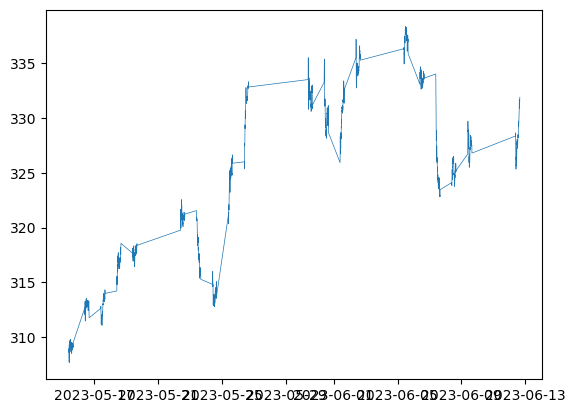

In [3]:
import matplotlib.pyplot as plt

plt.plot(ohlcv_data['MSFT']['Adj Close'], linewidth=0.5)

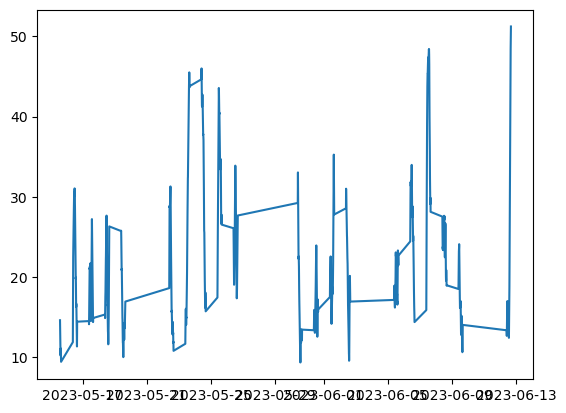

In [4]:
plt.plot(ohlcv_data['MSFT']['ADX'])